# Titanic Data Analysis

**Task**: `Do the Data Cleaning and Analyse of the data in python - pandas.`

**Dataset Description**

The Titanic dataset offers a comprehensive glimpse into the passengers aboard the ill-fated RMS Titanic, which famously sank on its maiden voyage in April 1912 after colliding with an iceberg. This dataset contains a wealth of information about individual passengers, including demographics, ticket class, cabin information, family relationships, fare details, and most notably, survival outcomes.

Key attributes within the dataset include:
- Passenger Class (Pclass): This categorical variable indicates the ticket class of each passenger, ranging from 1st class (wealthiest) to 3rd class (lower socioeconomic status).
- Name: The names of passengers, providing insight into their identities.
- Sex: Gender of passengers, categorized as male or female.
- Age: Age of passengers, providing information about the demographic composition of the Titanic's passengers.
- SibSp: Number of siblings/spouses aboard the Titanic, offering insight into family relationships.
- Parch: Number of parents/children aboard the Titanic, indicating family size and composition.
- Ticket: Ticket number, providing additional information about passenger accommodations and fare details.
- Fare: Fare paid by each passenger, which can be indicative of their ticket class and economic status.
- Cabin: Cabin number or location, offering insights into passenger accommodations.
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton), providing information about passengers' embarkation points.
- Survived: This binary variable indicates whether a passenger survived the disaster (1) or not (0), serving as the primary outcome variable for analyses.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import kagglehub
import os
import numpy as np

In [ ]:
kagglehub.login()

In [ ]:
# Download the dataset from my kaggle account

path = kagglehub.dataset_download("birukget/titanic")
print("Path to dataset files:", path)

In [7]:
os.listdir(path)[0]

'titanic.csv'

In [8]:
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]), encoding='latin-1')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis

In [9]:
df.shape

(950, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  950 non-null    int64  
 1   Survived     947 non-null    float64
 2   Pclass       950 non-null    object 
 3   Name         950 non-null    object 
 4   Sex          949 non-null    object 
 5   Age          765 non-null    float64
 6   SibSp        950 non-null    int64  
 7   ParCh        950 non-null    int64  
 8   Ticket       950 non-null    object 
 9   Fare         948 non-null    float64
 10  Cabin        219 non-null    object 
 11  Embarked     946 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 89.2+ KB


In [11]:
# Understand the numerical columns statistics
df.describe()

,PassengerId,Survived,Age,SibSp,ParCh,Fare
count,950.000000,947.000000,765.000000,950.000000,950.000000,948.000000
mean,475.500000,0.387540,29.810680,0.523158,6.020000,32.220415
std,274.385677,0.500288,14.520943,1.086846,122.890035,49.605518
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.250000,0.000000,21.000000,0.000000,0.000000,7.925000
50%,475.500000,0.000000,28.000000,0.000000,0.000000,14.458300
75%,712.750000,1.000000,39.000000,1.000000,0.000000,31.000000
max,950.000000,3.000000,80.000000,8.000000,2698.000000,512.329200


Looking into the data, the following columns have no null values:
* PassengerId,
* Pclass,
* Name,
* SibSp,
* ParCh, and
* Ticket       

In [12]:
df.duplicated().sum()

0

No duplicated records are found in the dataset.

### Handling Null Values

In [13]:
df.isnull().sum()

,0
PassengerId,0
Survived,3
Pclass,0
Name,0
Sex,1
Age,185
SibSp,0
ParCh,0
Ticket,0
Fare,2


Lets work on handling the Age column mising values. In order to do that, lets create an age group based on their title from their name.

In [14]:
def extract_title(name):
    """ Extract the title from a passenger's name. Split by comma then by dot to get the title.
        Handles cases where the name format is unexpected.
    """
    try:
        title = name.split(',')[1].strip().split(' ')[0]
    except IndexError:
        title = 'Unknown'
    return title

In [15]:
df['Title'] = df['Name'].apply(extract_title)

In [16]:
df['Title'].value_counts()

,count
Title,
Mr.,550
Miss.,189
Mrs.,140
Master.,42
Dr.,7
Rev.,6
Col.,2
Mlle.,2
Major.,2


In [17]:
# Mapping of titles to categories
title_mapping = {
    "Mr.": "Male",
    "Mrs.": "Female (married)",
    "Miss.": "Female (unmarried)",
    "Master.": "Male (Child/Unmarried)",
    "Don.": "Royal/Noble",
    "Rev.": "Officer (religious)",
    "Dr.": "Officer (doctor)",
    "Mme.": "Female (married)",
    "Ms.": "Female (Div/Wid.)",
    "Major.": "Officer (military)",
    "Lady.": "Royal/Noble",
    "Sir.": "Royal/Noble",
    "Mlle.": "Female (unmarried)",
    "Col.": "Officer (military)",
    "Capt.": "Officer (military)",
    "the": "Unknown",  # Can be ignored or categorized as unknown
    "Jonkheer.": "Royal/Noble"
}

In [18]:
df['Title_Category'] = df['Title'].replace(title_mapping)

In [19]:
df[['Name', 'Title', 'Title_Category']].head(10)

,Name,Title,Title_Category
0,"Braund, Mr. Owen Harris",Mr.,Male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,Female (married)
2,"Heikkinen, Miss. Laina",Miss.,Female (unmarried)
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,Female (married)
4,"Allen, Mr. William Henry",Mr.,Male
5,"Moran, Mr. James",Mr.,Male
6,"McCarthy, Mr. Timothy J",Mr.,Male
7,"Palsson, Master. Gosta Leonard",Master.,Male (Child/Unmarried)
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs.,Female (married)
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs.,Female (married)


In [20]:
columns_order = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Title', 'Title_Category', 'Sex', 'Age', 'SibSp', 'ParCh', 'Ticket', 'Fare', 'Cabin', 'Embarked']
titanic = df[columns_order]

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Title,Title_Category,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",Mr.,Male,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,Female (married),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",Miss.,Female (unmarried),female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,Female (married),female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",Mr.,Male,male,35.0,0,0,373450,8.0500,NaN,S


Fill missing null values of Age column by taking the `mean` at the level of Title_Category and Sex.

In [22]:
titanic['Age'] = titanic['Age'].fillna(titanic.groupby(['Title_Category', 'Sex'])['Age'].transform('mean'))

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     950 non-null    int64  
 1   Survived        947 non-null    float64
 2   Pclass          950 non-null    object 
 3   Name            950 non-null    object 
 4   Title           950 non-null    object 
 5   Title_Category  950 non-null    object 
 6   Sex             949 non-null    object 
 7   Age             950 non-null    float64
 8   SibSp           950 non-null    int64  
 9   ParCh           950 non-null    int64  
 10  Ticket          950 non-null    object 
 11  Fare            948 non-null    float64
 12  Cabin           219 non-null    object 
 13  Embarked        946 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 104.0+ KB


In [24]:
# Check the percentage of missing values in each column
percent_missing = titanic.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Percent Missing': np.round(percent_missing, 2)})
print(missing_value_df)

                Percent Missing
PassengerId                0.00
Survived                   0.32
Pclass                     0.00
Name                       0.00
Title                      0.00
Title_Category             0.00
Sex                        0.11
Age                        0.00
SibSp                      0.00
ParCh                      0.00
Ticket                     0.00
Fare                       0.21
Cabin                     76.95
Embarked                   0.42


Hence the following columns null values are smaller, we can drop null valued rows since the percentage is smaller and will not going make such an impact on the data.
* Survived
* Sex
* Fare, and
* Embarked
* Cabin - I will drop this column hence it holds almost 80% null values

Then, I'll start dropping the column with a higher number of null rows, i.e., `Embarked` then see the impact on the others.

In [25]:
titanic.drop('Cabin', axis=1, inplace=True)

In [26]:
titanic.dropna(subset=['Embarked'], inplace=True)

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 949
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     946 non-null    int64  
 1   Survived        943 non-null    float64
 2   Pclass          946 non-null    object 
 3   Name            946 non-null    object 
 4   Title           946 non-null    object 
 5   Title_Category  946 non-null    object 
 6   Sex             946 non-null    object 
 7   Age             946 non-null    float64
 8   SibSp           946 non-null    int64  
 9   ParCh           946 non-null    int64  
 10  Ticket          946 non-null    object 
 11  Fare            946 non-null    float64
 12  Embarked        946 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 103.5+ KB


After dropping the null values from `Embarked` column, all others columns, except Survived, null valued rows are also dropped. Now let's drop Survived null valued rows as well.

In [28]:
titanic.dropna(subset='Survived', inplace=True)

In [29]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Title,0
Title_Category,0
Sex,0
Age,0
SibSp,0
ParCh,0


Now all columns hold a non-null values which makes our downstream data analysis much easier.

## Data Insights - Analytics

### Survival Column

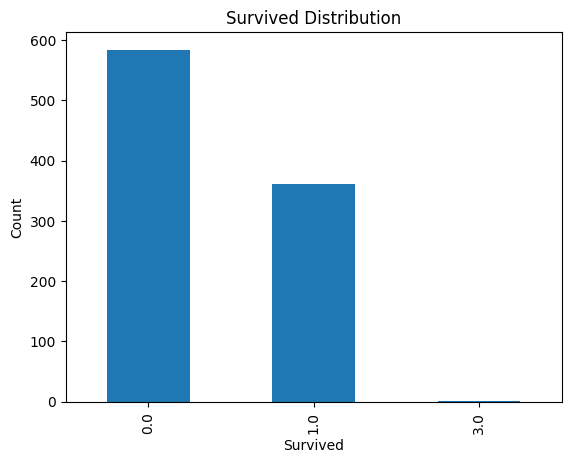

In [30]:
titanic['Survived'].value_counts().plot(kind='bar')
plt.title('Survived Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

### Passenger Column

In [43]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0.0,88,106,390
1.0,140,89,130


<Axes: xlabel='Survived'>

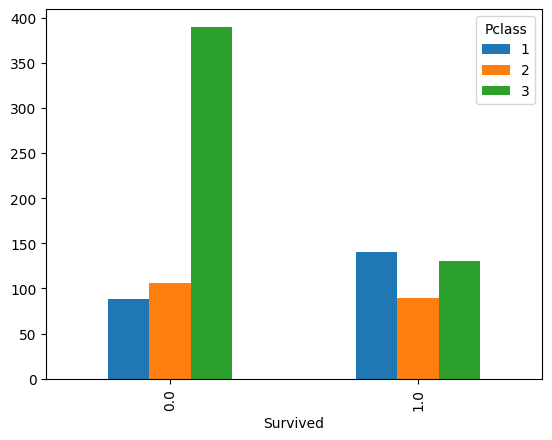

In [44]:
pd.crosstab(titanic['Survived'], titanic['Pclass']).plot(kind='bar')

*Note that*, the disaster's impact had a direct correlation with passenger class. Passengers in the lowest class were disproportionately affected compared to those in higher classes.

### Gender Column

In [45]:
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0.0,91,493
1.0,241,118


<Axes: xlabel='Survived'>

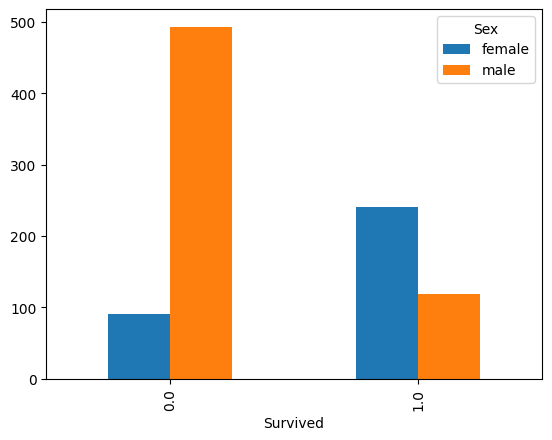

In [47]:
pd.crosstab(titanic['Survived'], titanic['Sex']).plot(kind='bar')

Male passengers were highly impacted by the disaster compared to females.

### Title Category

In [48]:
pd.crosstab(titanic['Survived'], titanic['Title_Category'])

Title_Category,Female (Div/Wid.),Female (married),Female (unmarried),Male,Male (Child/Unmarried),Officer (doctor),Officer (military),Officer (religious),Royal/Noble,Unknown
Survived,,,,,,,,,,
0.0,0,32,59,460,18,4,3,6,2,0
1.0,1,108,129,89,24,3,2,0,2,1


<Axes: xlabel='Title_Category'>

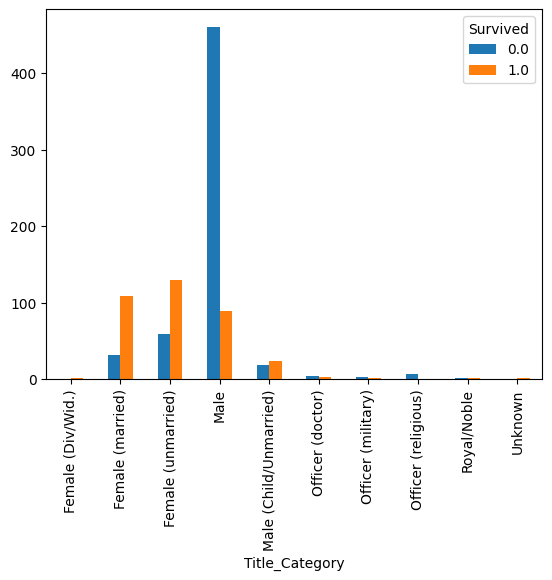

In [92]:
pd.crosstab(titanic['Title_Category'], titanic['Survived']).plot(kind='bar')

### Age Group

Since Age column holds a continous data, we need to divide the values to some distinct groups for analysis.

In [50]:
titanic['Age_Group'] = pd.cut(titanic['Age'], bins=[0, 12, 18, 60, float('inf')], labels=['Child', 'Teen', 'Adult', 'Senior'])

In [57]:
pd.crosstab(titanic['Survived'], titanic['Age_Group'])

Age_Group,Child,Teen,Adult,Senior
Survived,,,,
0.0,32,40,493,19
1.0,43,32,280,4


<Axes: xlabel='Age_Group'>

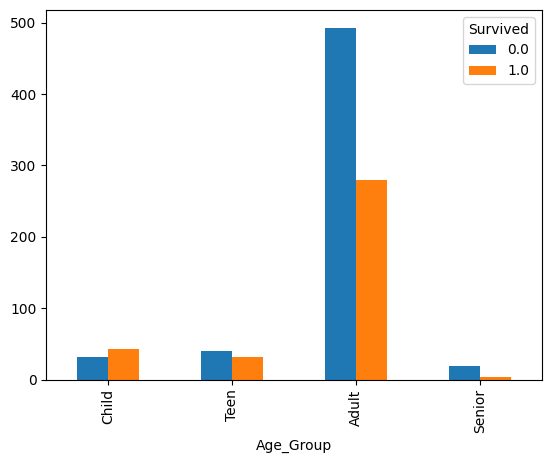

In [90]:
pd.crosstab(titanic['Age_Group'], titanic['Survived']).plot(kind='bar')

Adults and Seniors are highly affected by the disaster.

### Fare Category

In [86]:
bins = [-1, 0, 7.91, 14.45, 31.28, 512]
labels = ['Free', 'Low', 'Medium', 'High', 'Very High']

In [87]:
titanic['Fare_Category'] = pd.cut(titanic['Fare'], bins=bins, labels=labels)

In [88]:
pd.crosstab(titanic['Fare_Category'], titanic['Survived'])

Survived,0.0,1.0
Fare_Category,,
Free,14,1
Low,172,48
Medium,157,72
High,148,106
Very High,93,129


<Axes: xlabel='Fare_Category'>

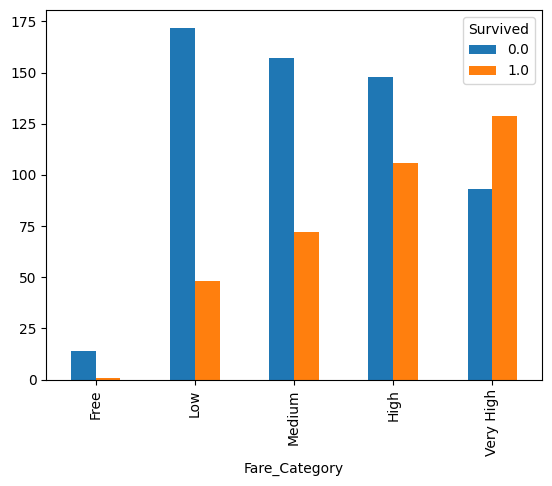

In [99]:
pd.crosstab(titanic['Fare_Category'], titanic['Survived']).plot(kind='bar')

Passengers with the lowest fare category had affected more by the disaster.

### Composite Columns - `Gender and Age Group`

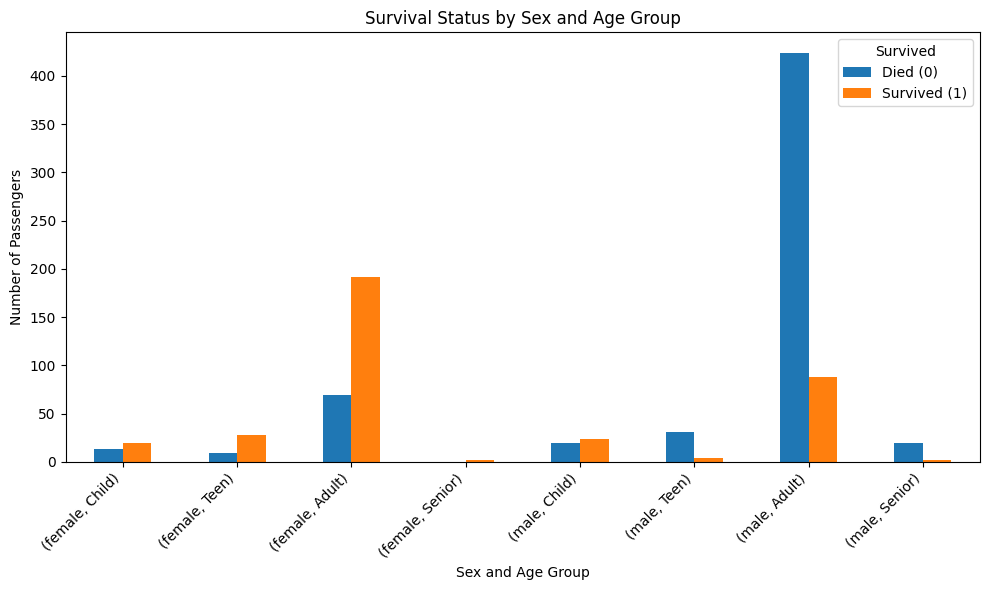

In [113]:
survival_counts = pd.crosstab([titanic['Sex'], titanic['Age_Group']], titanic['Survived'])

survival_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Status by Sex and Age Group')
plt.xlabel('Sex and Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Survived', labels=['Died (0)', 'Survived (1)'])
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [124]:
def plot_survival_crosstab(data, columns, target_column='Survived'):
    """
    Generates a cross-tabulation and bar plot for survival status based on specified columns.
    """
    survival_counts = pd.crosstab([data[col] for col in columns], data[target_column])

    # Automatically generate title and labels
    title = f'Survival Status by {", ".join(columns)}'
    xlabel = f'{", ".join(columns)}'
    ylabel = 'Number of Passengers'

    survival_counts.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=target_column, labels=['Died (0)', 'Survived (1)'])
    plt.tight_layout()
    plt.show()

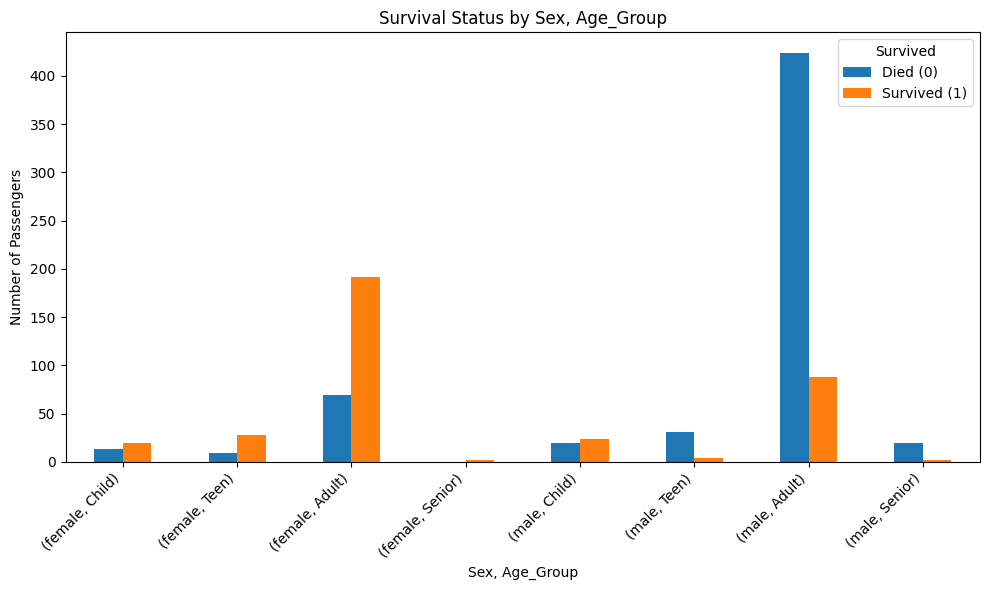

In [125]:
plot_survival_crosstab(titanic, ['Sex', 'Age_Group'])

Clearly, the male passengers are most affected. Specifically; male senior, male adult, male teen are highly affected.

### Composite Columns - `Gender and Title Category`

In [121]:
pd.crosstab([titanic['Sex'], titanic['Title_Category']], titanic['Survived'])

Survived                       0.0  1.0
Sex    Title_Category                  
female Female (Div/Wid.)         0    1
       Female (married)         32  108
       Female (unmarried)       59  129
       Officer (doctor)          0    1
       Royal/Noble               0    1
       Unknown                   0    1
male   Male                    460   89
       Male (Child/Unmarried)   18   24
       Officer (doctor)          4    2
       Officer (military)        3    2
       Officer (religious)       6    0
       Royal/Noble               2    1

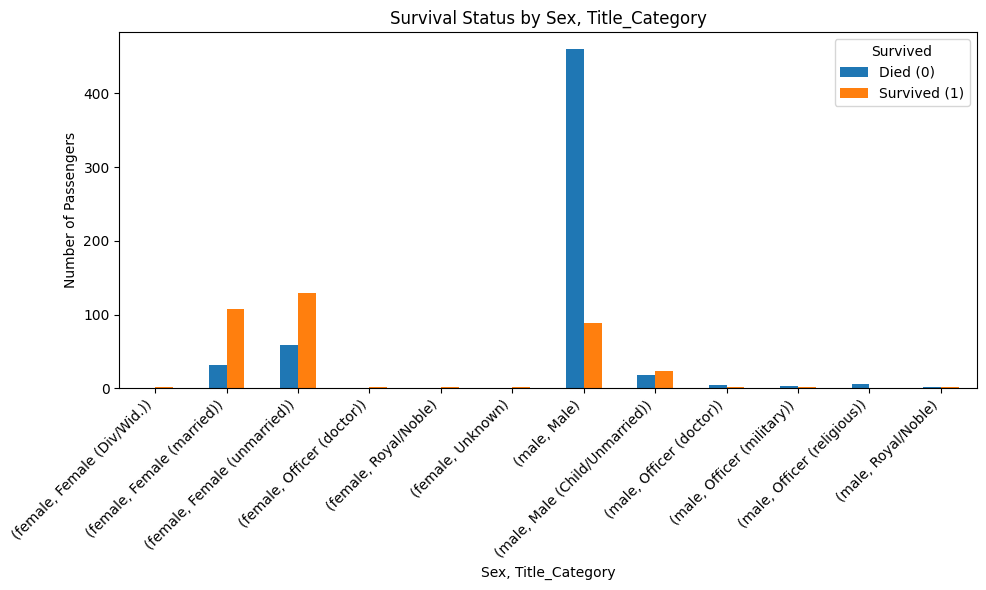

In [118]:
# Lets draw the chart by calling the function
plot_survival_crosstab(titanic, ['Sex', 'Title_Category'])

### Composite Columns - `Gender and Embarked`

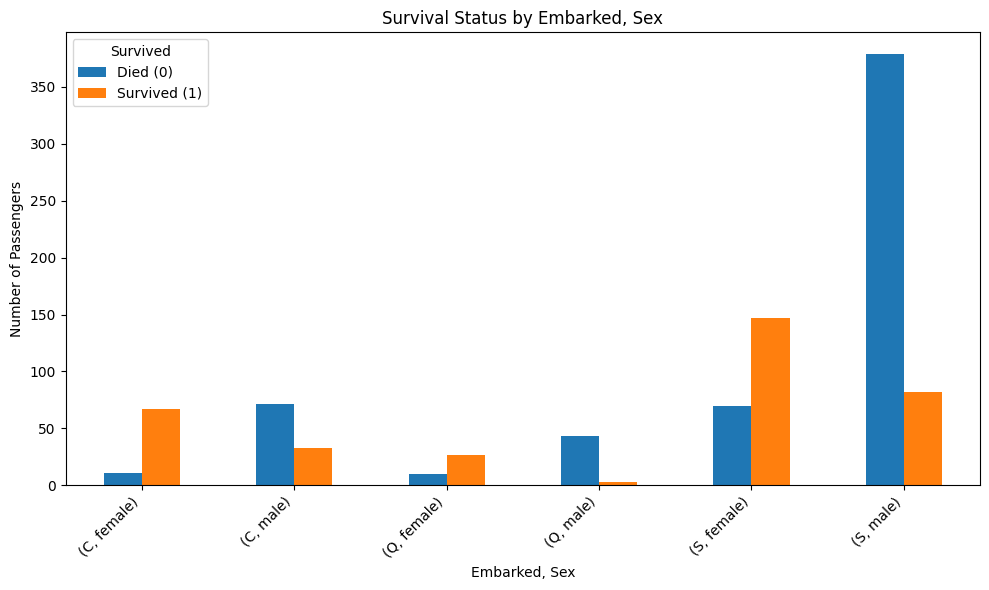

In [120]:
plot_survival_crosstab(titanic, ['Embarked', 'Sex'])